## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

Deskripsi :
Mengimpor pustaka yang diperlukan untuk analisis data, visualisasi, preprocessing, dan modeling:
- pandas dan numpy untuk manipulasi data.
- seaborn dan matplotlib untuk visualisasi.
- sklearn.preprocessing untuk encoding dan standarisasi.
- TfidfVectorizer untuk ekstraksi fitur teks.
- cosine_similarity untuk menghitung kesamaan antar produk.
- warnings untuk mengabaikan peringatan yang tidak relevan.

Library yang diimpor menunjukkan bahwa kode ini akan melakukan analisis data, visualisasi, pra-pemrosesan, dan pembangunan sistem rekomendasi.

## Load Data

In [2]:
hm1 = pd.read_csv('https://raw.githubusercontent.com/Ezraliano/Dataset_HM/refs/heads/main/handm.csv')
hm1.head()
hm1.tail()

,Unnamed: 0,productId,productName,brandName,url,price,stockState,comingSoon,colorName,isOnline,colors,colorShades,newArrival,mainCatCode,details,materials
9672,9672,1199187014,Slim Straight High Jeans,H&M,https://www2.hm.com/en_us/productpage.11991870...,34.99,Available,False,Beige,True,BBAB92,Ecru|Taupe|Wheat,False,ladies_jeans_straight,"Straight-fit, 5-pocket jeans in cotton denim w...","COMPOSITION\nShell:Cotton 99%, Spandex 1%\nPoc..."
9673,9673,1198343002,Bootcut High Jeans,H&M,https://www2.hm.com/en_us/productpage.11983430...,39.99,Available,False,Light denim blue,True,79829D,Blue gray|Bright blue|Pastel blue|Royal blue,False,ladies_jeans_bootcut,"5-pocket, bootcut jeans in cotton denim with g...","COMPOSITION\nShell:Cotton 99%, Spandex 1%\nPad..."
9674,9674,1232588003,Lace Push-up Bra,H&M,https://www2.hm.com/en_us/productpage.12325880...,17.99,Available,False,Powder pink,True,CCC2C2,Coral|Dusty pink|Light pink|Salmon,False,ladies_lingerie_bras_padded,Push-up bra in lace. Adjustable shoulder strap...,"COMPOSITION\nFront:Polyamide 88%, Spandex 12%\..."
9675,9675,1208310002,2-pack Padded Soft-cup Cotton Bras,H&M,https://www2.hm.com/en_us/productpage.12083100...,24.99,Available,False,Beige/black,True,BEA894,Ecru|Taupe|Wheat,False,ladies_lingerie_bras_multipack,Soft-cup bras in cotton jersey. Adjustable sho...,"COMPOSITION\nShell:Cotton 95%, Spandex 5%\nLin..."
9676,9676,1227825002,Padded Balconette Bikini Top,H&M,https://www2.hm.com/en_us/productpage.12278250...,19.99,Available,False,Brown,True,745A43,NaN,False,ladies_swimwear_bikinisets_tops,"Lined balconette bikini top. Detachable, adjus...","COMPOSITION\nShell:Polyester 93%, Spandex 7%\n..."


Deskripsi
Memuat dataset H&M dari URL dan menampilkan 5 baris pertama dan terakhir untuk memeriksa struktur data.
Dataset berisi informasi produk seperti productId, price, colorName, mainCatCode, dll.

## Univariate Explorasi Data Analysis

In [3]:
print(hm1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   9677 non-null   int64  
 1   productId    9677 non-null   int64  
 2   productName  9677 non-null   object 
 3   brandName    9677 non-null   object 
 4   url          9677 non-null   object 
 5   price        9677 non-null   float64
 6   stockState   9677 non-null   object 
 7   comingSoon   9677 non-null   bool   
 8   colorName    9677 non-null   object 
 9   isOnline     9677 non-null   bool   
 10  colors       9677 non-null   object 
 11  colorShades  6511 non-null   object 
 12  newArrival   9677 non-null   bool   
 13  mainCatCode  9677 non-null   object 
 14  details      9676 non-null   object 
 15  materials    9518 non-null   object 
dtypes: bool(3), float64(1), int64(2), object(10)
memory usage: 1011.3+ KB
None


Deskripsi : menampilkan informasi tentang jumlah baris, kolom, tipe data, dan memori yang digunakan.

In [4]:
hm1.describe()

,Unnamed: 0,productId,price
count,9677.000000,9.677000e+03,9677.000000
mean,4838.000000,1.188702e+09,34.215088
std,2793.653611,1.206040e+08,28.262665
min,0.000000,1.077270e+08,3.990000
25%,2419.000000,1.198945e+09,18.990000
50%,4838.000000,1.230524e+09,29.990000
75%,7257.000000,1.244770e+09,39.990000
max,9676.000000,1.280785e+09,469.000000


Deskripsi : memberikan statistik deskriptif (seperti rata-rata, minimum, maksimum) untuk kolom numerik.

In [5]:
# Mengecek nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(hm1.isnull().sum())


Jumlah Nilai yang Hilang per Kolom:
Unnamed: 0        0
productId         0
productName       0
brandName         0
url               0
price             0
stockState        0
comingSoon        0
colorName         0
isOnline          0
colors            0
colorShades    3166
newArrival        0
mainCatCode       0
details           1
materials       159
dtype: int64


Deskripsi : memeriksa jumlah nilai yang hilang di setiap kolom untuk mengetahui kualitas data.

In [6]:
# 1. Identifikasi kolom numerik dan kategorikal
numeric_cols = ['price']
categorical_cols = ['stockState', 'comingSoon', 'colorName', 'isOnline', 'newArrival', 'mainCatCode']

print("Kolom Numerik:", numeric_cols)
print("Kolom Kategorikal:", categorical_cols)

Kolom Numerik: ['price']
Kolom Kategorikal: ['stockState', 'comingSoon', 'colorName', 'isOnline', 'newArrival', 'mainCatCode']


Deskripsi :
- Kolom kategorikal dipilih untuk analisis distribusi dan encoding di langkah berikutnya.
- Pemisahan ini memudahkan analisis spesifik untuk setiap jenis data.

In [7]:
# 2. Analisis Numerik: price
print("\nStatistik Deskriptif untuk Price:")
print(hm1['price'].describe())


Statistik Deskriptif untuk Price:
count    9677.000000
mean       34.215088
std        28.262665
min         3.990000
25%        18.990000
50%        29.990000
75%        39.990000
max       469.000000
Name: price, dtype: float64


Deskripsi :
- hm1['price'].describe() memberikan statistik seperti rata-rata, median, minimum, dan maksimum untuk kolom price.

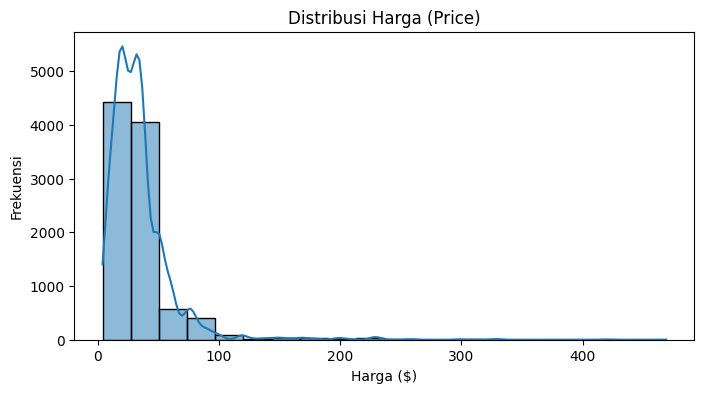

In [8]:
# Histogram untuk price
plt.figure(figsize=(8, 4))
sns.histplot(hm1['price'], kde=True, bins=20)
plt.title('Distribusi Harga (Price)')
plt.xlabel('Harga ($)')
plt.ylabel('Frekuensi')
plt.show()

Deskripsi :
- Histogram (sns.histplot) menunjukkan distribusi harga, dengan kurva KDE (Kernel Density Estimation) untuk memperkirakan kepadatan distribusi kolom price


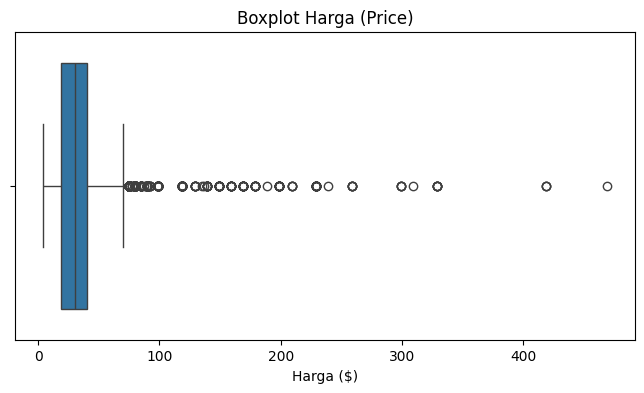

In [9]:
# Boxplot untuk price
plt.figure(figsize=(8, 4))
sns.boxplot(x=hm1['price'])
plt.title('Boxplot Harga (Price)')
plt.xlabel('Harga ($)')
plt.show()

Deskripsi :
- Boxplot (sns.boxplot) mengidentifikasi outlier dan memberikan gambaran tentang penyebaran data (quartiles).


Distribusi untuk kolom: stockState
stockState
Available    9677
Name: count, dtype: int64


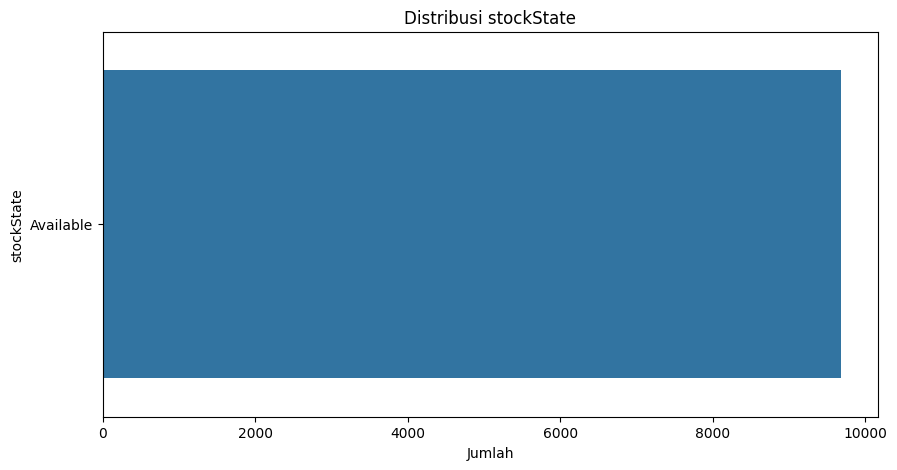


Distribusi untuk kolom: comingSoon
comingSoon
False    9677
Name: count, dtype: int64


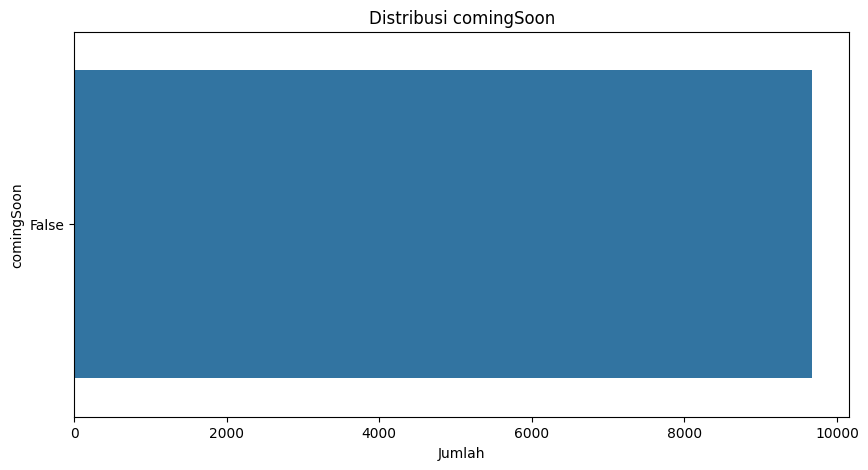


Distribusi untuk kolom: colorName
colorName
Black                           2466
White                            681
Cream                            449
Light beige                      398
Dark gray                        313
                                ... 
Light blue/pinstriped              1
Light gray/Outkast                 1
Blue/University of Cambridge       1
Light blue/light beige             1
Beige/ombre                        1
Name: count, Length: 1031, dtype: int64
Kolom colorName memiliki terlalu banyak kategori (1031), visualisasi dilewati.

Distribusi untuk kolom: isOnline
isOnline
True    9677
Name: count, dtype: int64


<Figure size 1000x500 with 0 Axes>

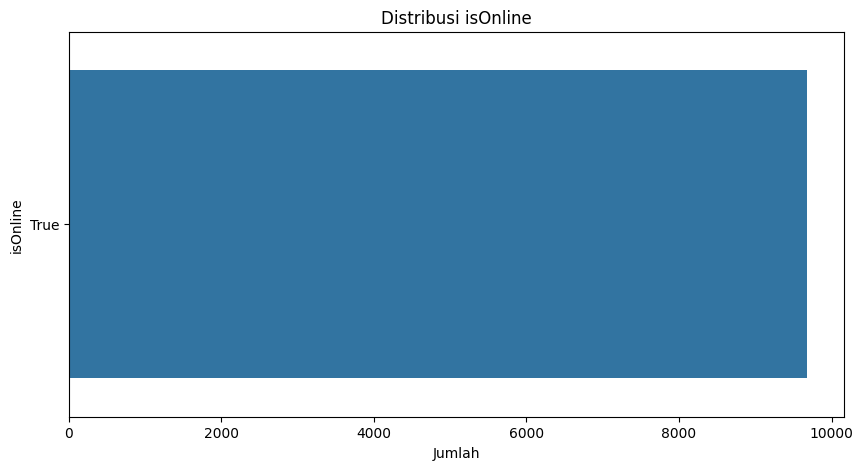


Distribusi untuk kolom: newArrival
newArrival
False    8373
True     1304
Name: count, dtype: int64


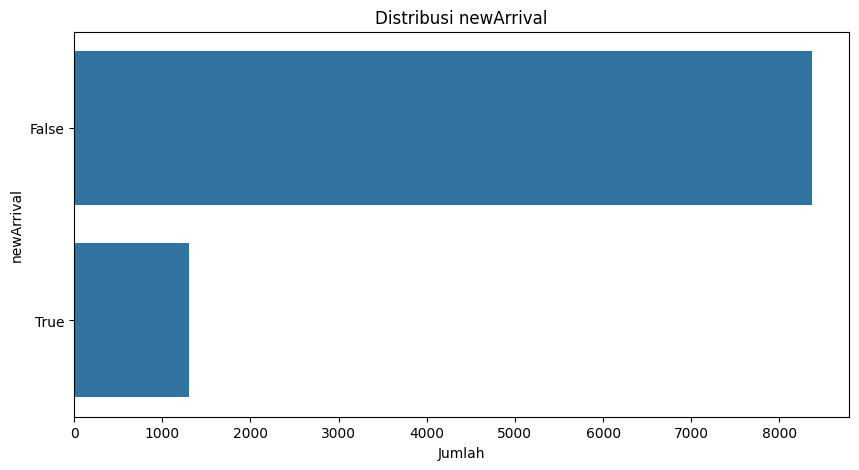


Distribusi untuk kolom: mainCatCode
mainCatCode
ladies_cardigansjumpers_jumpers          361
men_shirts_casual                        250
ladies_dresses_shortdresses              170
ladies_tops_longsleeve                   164
ladies_tops_shortsleeve                  162
                                        ... 
sportswear_men_activity_hiking             1
ladies_shoes                               1
ladies_maternity_swimwear                  1
sportswear_women_activity_watersports      1
sportswear_women_clothing_tops_tanks       1
Name: count, Length: 355, dtype: int64
Kolom mainCatCode memiliki terlalu banyak kategori (355), visualisasi dilewati.


<Figure size 1000x500 with 0 Axes>

In [10]:
# 3. Analisis Kategorikal
for col in categorical_cols:
    print(f"\nDistribusi untuk kolom: {col}")
    print(hm1[col].value_counts(dropna=False))

    # Count plot (batasi jika terlalu banyak kategori)
    plt.figure(figsize=(10, 5))
    if hm1[col].nunique() <= 20:
        sns.countplot(y=hm1[col], order=hm1[col].value_counts().index[:20])
        plt.title(f'Distribusi {col}')
        plt.xlabel('Jumlah')
        plt.ylabel(col)
        plt.show()
    else:
        print(f"Kolom {col} memiliki terlalu banyak kategori ({hm1[col].nunique()}), visualisasi dilewati.")


Deskripsi :
- Untuk setiap kolom kategorikal, value_counts(dropna=False) menampilkan distribusi nilai, termasuk nilai yang hilang.
- sns.countplot membuat visualisasi batang untuk kolom dengan jumlah kategori unik ≤ 20, menunjukkan frekuensi setiap kategori.
- Jika jumlah kategori > 20, visualisasi dilewati untuk menghindari plot yang terlalu padat.

Alasan :
- Analisis ini mengungkapkan distribusi kategori, misalnya, apakah beberapa warna atau kategori produk mendominasi
- Batasan 20 kategori mencegah visualisasi yang tidak informatif untuk kolom seperti colorName yang mungkin memiliki banyak nilai unik.
- Informasi ini penting untuk menentukan kolom mana yang relevan untuk encoding.

## Data Preparation


In [11]:
# Langkah 1: Menangani Missing Values
print("Jumlah Missing Values Sebelum Preprocessing:")
print(hm1.isnull().sum())

# details: Isi dengan string kosong
hm1['details'].fillna('', inplace=True)

# materials: Isi dengan string kosong
hm1['materials'].fillna('', inplace=True)

# colorShades: Isi dengan 'Unknown'
hm1['colorShades'].fillna('Unknown', inplace=True)

# Verifikasi missing values setelah penanganan
print("\nJumlah Missing Values Setelah Penanganan:")
print(hm1.isnull().sum())

Jumlah Missing Values Sebelum Preprocessing:
Unnamed: 0        0
productId         0
productName       0
brandName         0
url               0
price             0
stockState        0
comingSoon        0
colorName         0
isOnline          0
colors            0
colorShades    3166
newArrival        0
mainCatCode       0
details           1
materials       159
dtype: int64

Jumlah Missing Values Setelah Penanganan:
Unnamed: 0     0
productId      0
productName    0
brandName      0
url            0
price          0
stockState     0
comingSoon     0
colorName      0
isOnline       0
colors         0
colorShades    0
newArrival     0
mainCatCode    0
details        0
materials      0
dtype: int64


Deskripsi :
- Pertama, kode memeriksa jumlah nilai yang hilang untuk setiap kolom.
- Kolom details dan materials diisi dengan string kosong karena ini adalah kolom teks, dan string kosong cocok untuk analisis teks seperti TF-IDF.
- Kolom colorShades diisi dengan 'Unknown' untuk mengisi missing values yang ada pada kolom ini
- Pilihan pengisian (string kosong untuk teks, 'Unknown' untuk kategori) sesuai dengan sifat kolom.

In [12]:
# Langkah 2: Memeriksa dan Menghapus Duplikasi
print("\nJumlah Duplikasi berdasarkan productId:", hm1['productId'].duplicated().sum())
hm1 = hm1.drop_duplicates(subset=['productId'], keep='first')


Jumlah Duplikasi berdasarkan productId: 2006


Deskripsi :
- hm1['productId'].duplicated().sum() menghitung jumlah baris dengan productId yang sama.
- drop_duplicates menghapus duplikasi berdasarkan productId, menyimpan baris pertama yang ditemukan.

Alasan :
- Menghapus duplikasi memastikan bahwa setiap produk hanya diwakili sekali, yang penting untuk sistem rekomendasi


In [13]:
# Langkah 3: Menghapus Kolom Tidak Relevan
cols_to_drop = ['Unnamed: 0', 'url', 'productName']
# Periksa apakah kolom konstan
for col in ['isOnline', 'comingSoon', 'stockState']:
    if hm1[col].nunique() == 1:
        cols_to_drop.append(col)
        print(f"Kolom {col} nilai konstan, akan dihapus.")

hm1 = hm1.drop(columns=cols_to_drop, errors='ignore')

Kolom isOnline nilai konstan, akan dihapus.
Kolom comingSoon nilai konstan, akan dihapus.
Kolom stockState nilai konstan, akan dihapus.


Deskripsi :
 - Kolom seperti Unnamed: 0 (indeks tambahan), url, dan productName dianggap tidak relevan untuk sistem rekomendasi dan dimasukkan ke daftar cols_to_drop.
 - Kode memeriksa apakah kolom isOnline, comingSoon, dan stockState memiliki nilai konstan (satu nilai unik). Jika ya, kolom tersebut ditambahkan ke cols_to_drop karena tidak memberikan informasi tambahan.
 - hm1.drop menghapus kolom-kolom ini, dengan errors='ignore' untuk mencegah error jika kolom tidak ada

 Alasan :
 - Menghapus kolom yang tidak relevan atau konstan mengurangi dimensi data dan meningkatkan efisiensi.

In [14]:
# Langkah 4: Encoding Variabel Kategorikal
categorical_cols = ['colorName', 'mainCatCode', 'brandName', 'colorShades', 'newArrival']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(hm1[categorical_cols])
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))
# Gabungkan dengan dataset
hm1_encoded = pd.concat([hm1.reset_index(drop=True), encoded_cats_df.reset_index(drop=True)], axis=1)
# Hapus kolom kategorikal asli
hm1_encoded = hm1_encoded.drop(columns=categorical_cols)

Deskripsi :
- Kolom kategorikal baru dipilih: colorName, mainCatCode, brandName, colorShades, newArrival.
- OneHotEncoder mengubah setiap kategori menjadi kolom biner (0 atau 1). Parameter sparse_output=False menghasilkan array padat, dan handle_unknown='ignore' menangani kategori baru di data uji.
- Hasil encoding disimpan dalam DataFrame encoded_cats_df dengan nama kolom yang mencerminkan kategori.
- DataFrame asli (hm1) digabungkan dengan kolom hasil encoding, dan kolom kategorikal asli dihapus.

Alasan :
- One-Hot Encoding cocok untuk kolom kategorikal tanpa urutan, seperti warna atau merek.
- Penghapusan kolom asli mencegah redundansi dan menjaga data tetap bersih.
- Encoding meningkatkan dimensi data, yang bisa menjadi tantangan untuk dataset besar.

In [15]:
# Langkah 5: Standarisasi Kolom Numerik (price)
scaler = StandardScaler()
hm1_encoded['price_scaled'] = scaler.fit_transform(hm1[['price']])

Deskripsi :
- StandardScaler menstandarisasi price sehingga memiliki rata-rata 0 dan standar deviasi 1.
- Kolom hasilnya (price_scaled) ditambahkan ke hm1_encoded.

Alasan :
- Standarisasi penting untuk algoritma berbasis jarak seperti cosine similarity, agar fitur numerik tidak mendominasi karena skala yang berbeda.
- Hanya price yang distandarisasi karena ini satu-satunya kolom numerik.

In [16]:
# Langkah 6: Feature Engineering
# - Buat segmen harga
hm1_encoded['price_segment'] = pd.cut(hm1['price'],
                                     bins=[0, 30, 50, float('inf')],
                                     labels=['Murah', 'Menengah', 'Premium'])

# - Ekstraksi TF-IDF untuk details dan materials
tfidf = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_details = tfidf.fit_transform(hm1['details'])
tfidf_details_df = pd.DataFrame(tfidf_details.toarray(),
                                columns=[f"details_{f}" for f in tfidf.get_feature_names_out()])

tfidf_materials = tfidf.fit_transform(hm1['materials'])
tfidf_materials_df = pd.DataFrame(tfidf_materials.toarray(),
                                  columns=[f"materials_{f}" for f in tfidf.get_feature_names_out()])

# Gabungkan fitur TF-IDF
hm1_encoded = pd.concat([hm1_encoded.reset_index(drop=True),
                         tfidf_details_df.reset_index(drop=True),
                         tfidf_materials_df.reset_index(drop=True)], axis=1)

Deskripsi :
- pd.cut mengelompokkan harga ke dalam tiga segmen: Murah (≤$30), Menengah ($30–$50), dan Premium (>$50).
- Fitur baru price_segment ditambahkan ke hm1_encoded.
- TfidfVectorizer mengubah teks dalam details dan materials menjadi vektor numerik berdasarkan pentingnya kata (TF-IDF). Parameter max_features=100 membatasi jumlah kata, dan stop_words='english' menghapus kata umum seperti "the".
- Hasilnya adalah matriks sparse yang diubah menjadi DataFrame (tfidf_details_df dan tfidf_materials_df) dengan nama kolom yang mencerminkan kata.
- DataFrame ini digabungkan dengan hm1_encoded.

In [17]:
# Langkah 7: Menangani Kolom colors
hm1_encoded = hm1_encoded.drop(columns=['colors'], errors='ignore')

Deskripsi :
 - Kolom colors dihapus karena redundan dengan colorName.
 - Parameter errors='ignore' mencegah error jika kolom tidak ada.

In [18]:
# Gabungkan semua fitur
hm1_encoded = pd.concat([
    hm1[['productId', 'price']].reset_index(drop=True),
    hm1_encoded[['price_scaled']].reset_index(drop=True),
    encoded_cats_df.reset_index(drop=True),
    tfidf_details_df.reset_index(drop=True),
    tfidf_materials_df.reset_index(drop=True)
], axis=1)

Deskripsi :
 - Dataset akhir (hm1_encoded) mencakup productId, price, price_scaled, fitur kategorikal yang diencode, dan fitur TF-IDF dari details dan materials.
 - reset_index(drop=True) memastikan indeks selaras saat penggabungan.

Alasan :
- Penggabungan ini menciptakan dataset lengkap untuk sistem rekomendasi.
- Menyimpan productId dan price memungkinkan pelacakan produk dan filtering berdasarkan harga.

In [19]:
# Simpan informasi produk untuk output rekomendasi
hm1_info = hm1[['productId', 'price', 'colorName', 'mainCatCode', 'brandName', 'newArrival']].copy()

Deskripsi :
- DataFrame hm1_info menyimpan kolom yang relevan untuk menampilkan rekomendasi (ID, harga, warna, kategori, merek, status baru)
- .copy() memastikan bahwa ini adalah salinan independen dari hm1.

## Modelling


In [20]:
# Langkah 1: Pilih fitur untuk content-based filtering
feature_cols = [col for col in hm1_encoded.columns if col not in ['productId', 'price']]
feature_matrix = hm1_encoded[feature_cols].values

Deskripsi :    
- Feature_cols mencakup semua kolom kecuali productId dan price, karena ini adalah fitur untuk menghitung kesamaan
- Feature_matrix adalah array NumPy dari fitur-fitur ini.

In [21]:
# Langkah 2: Hitung cosine similarity
similarity_matrix = cosine_similarity(feature_matrix)

Deskripsi :    
- Cosine_similarity menghitung kesamaan antar produk berdasarkan vektor fitur, menghasilkan matriks kesamaan.

In [22]:
# Langkah 3: Fungsi untuk mendapatkan rekomendasi
def get_recommendations(product_id, num_recommendations=5, price_range=None):
    idx = hm1_encoded.index[hm1_encoded['productId'] == product_id].tolist()
    if not idx:
        return "Product ID tidak ditemukan."
    idx = idx[0]

    # Ambil skor kesamaan
    sim_scores = list(enumerate(similarity_matrix[idx]))

    # Filter berdasarkan price_range jika ditentukan
    if price_range is not None:
        target_price = hm1_encoded.loc[idx, 'price']
        sim_scores = [(i, s) for i, s in sim_scores
                      if abs(hm1_encoded.loc[i, 'price'] - target_price) <= price_range]

    # Urutkan berdasarkan skor kesamaan
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]

    # Ambil indeks produk yang direkomendasikan
    product_indices = [i[0] for i in sim_scores]

    # Kembalikan informasi produk
    return hm1_info.iloc[product_indices][['productId', 'price', 'colorName', 'mainCatCode', 'brandName', 'newArrival']]

Deskripsi :    
- Fungsi mengambil product_id, jumlah rekomendasi (num_recommendations), dan batas harga (price_range).
- Mencari indeks produk berdasarkan productId. Jika tidak ditemukan, mengembalikan pesan error
- Mengambil skor kesamaan dari similarity_matrix untuk produk tersebut.
- Jika price_range diberikan, menyaring produk yang harganya berada dalam kisaran ±price_range dari harga produk target.
- Mengurutkan skor kesamaan, mengambil num_recommendations produk teratas (kecuali produk itu sendiri), dan mengembalikan informasi produk dari hm1_info.

In [23]:
# Langkah 4: Contoh rekomendasi
sample_product_ids = hm1_encoded['productId'].head(3).tolist()
for pid in sample_product_ids:
    print(f"\nRekomendasi untuk productId={pid} (dengan price_range=10):")
    print(get_recommendations(product_id=pid, num_recommendations=5, price_range=10))


Rekomendasi untuk productId=834333001 (dengan price_range=10):
      productId  price colorName        mainCatCode brandName  newArrival
30   1214026001  49.99     Black  men_shoes_dressed       H&M       False
91   1238739001  54.99     Black  men_shoes_dressed       H&M       False
68   1238692001  59.99     Black  men_shoes_dressed       H&M       False
113  1215930001  59.99     Black  men_shoes_dressed       H&M       False
2    1036812001  56.99     Black  men_shoes_dressed       H&M       False

Rekomendasi untuk productId=1258600003 (dengan price_range=10):
      productId  price colorName               mainCatCode brandName  \
97   1072678004  19.99     Black        men_shoes_slippers       H&M   
85   1200013001  29.99     Black        men_shoes_slippers       H&M   
135  1172015001  24.99     Black  ladies_shoes_ankle_boots       H&M   
47   1019486001  29.99     Black           men_shoes_boots       H&M   
57   1041066001  31.99     Black        men_shoes_slippers       H&

Deskripsi :    
- Mengambil tiga productId pertama dari hm1_encoded.
- Untuk setiap ID, memanggil get_recommendations dengan price_range=10 dan menampilkan hasilnya.

## Evaluasi Model


In [24]:
# Langkah 1: Pilih produk contoh dari kategori berbeda
# Memilih productId dari beberapa mainCatCode yang representatif
sample_products = hm1_info.groupby('mainCatCode').head(1)[['productId', 'mainCatCode']].head(3)
sample_product_ids = sample_products['productId'].tolist()
sample_categories = sample_products['mainCatCode'].tolist()

Deskripsi :    
- Memilih satu produk dari tiga kategori berbeda menggunakan groupby('mainCatCode').head(1)

In [25]:
# Langkah 2: Tampilkan rekomendasi untuk setiap produk contoh
for pid, cat in zip(sample_product_ids, sample_categories):
    print(f"\n=== Rekomendasi untuk productId={pid} (Kategori: {cat}) ===")
    print("Produk Asli:")
    # Include 'details' and 'materials' when creating hm1_info
    print(hm1[hm1['productId'] == pid][['productId', 'price', 'colorName', 'mainCatCode', 'brandName', 'newArrival', 'details', 'materials']])
    print("\nProduk yang Direkomendasikan (dengan price_range=10):")

    # Get recommendations and similarity scores
    idx = hm1_encoded.index[hm1_encoded['productId'] == pid].tolist()[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]

    # Fix: Extract product indices and similarity scores correctly
    product_indices = [i for i, s in sim_scores]
    similarity_scores = [s for i, s in sim_scores]

    recommendations = hm1_info.iloc[product_indices][['productId', 'price', 'colorName', 'mainCatCode', 'brandName', 'newArrival']]
    recommendations['similarity_score'] = similarity_scores

    print(recommendations)
    print("\nInterpretasi:")
    # Analisis kualitatif
    same_category = (recommendations['mainCatCode'] == cat).sum()
    similar_colors = recommendations['colorName'].str.contains(hm1_info.loc[hm1_info['productId'] == pid, 'colorName'].iloc[0], case=False, na=False).sum()
    print(f"- {same_category}/5 rekomendasi memiliki kategori yang sama ({cat}).")
    print(f"- {similar_colors}/5 rekomendasi memiliki warna serupa.")
    print(f"- Rentang harga rekomendasi: ${recommendations['price'].min():.2f} - ${recommendations['price'].max():.2f}")
    print(f"- Skor kesamaan: {recommendations['similarity_score'].min():.3f} - {recommendations['similarity_score'].max():.3f}")


=== Rekomendasi untuk productId=834333001 (Kategori: men_shoes_dressed) ===
Produk Asli:
   productId  price colorName        mainCatCode brandName  newArrival  \
0  834333001  49.99     Black  men_shoes_dressed       H&M       False   

                                             details  \
0  Derby shoes with open lacing at front. Canvas ...   

                                           materials  
0  COMPOSITION\nSole:Thermoplastic rubber 100%\nU...  

Produk yang Direkomendasikan (dengan price_range=10):
      productId  price colorName        mainCatCode brandName  newArrival  \
30   1214026001  49.99     Black  men_shoes_dressed       H&M       False   
91   1238739001  54.99     Black  men_shoes_dressed       H&M       False   
68   1238692001  59.99     Black  men_shoes_dressed       H&M       False   
113  1215930001  59.99     Black  men_shoes_dressed       H&M       False   
2    1036812001  56.99     Black  men_shoes_dressed       H&M       False   

     similarity_scor

Deskripsi :    
- Menampilkan informasi produk asli, termasuk details dan materials.
- Menghitung rekomendasi dengan cara yang sama seperti fungsi sebelumnya, tetapi menyertakan skor kesamaan.
- Menganalisis rekomendasi secara kualitatif, menghitung :    
  - Jumlah rekomendasi dalam kategori yang sama.
  - Jumlah rekomendasi dengan warna serupa (menggunakan pencocokan string).
  - Rentang harga rekomendasi.
  - Rentang skor kesamaan.

Alasan :    
- Analisis ini mengevaluasi kualitas rekomendasi berdasarkan kategori, warna, dan harga.
- Penyertaan details dan materials memberikan konteks tambahan tentang produk asli.
- Interpretasi kualitatif membantu memahami apakah sistem merekomendasikan produk yang relevan.

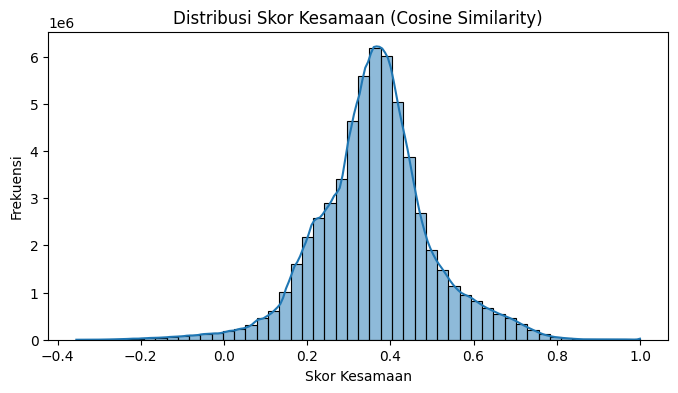

In [26]:
# Langkah 3: Analisis distribusi skor kesamaan
plt.figure(figsize=(8, 4))
sns.histplot(similarity_matrix.flatten(), bins=50, kde=True)
plt.title('Distribusi Skor Kesamaan (Cosine Similarity)')
plt.xlabel('Skor Kesamaan')
plt.ylabel('Frekuensi')
plt.show()

Deskripsi :    
- similarity_matrix.flatten() mengubah matriks kesamaan menjadi array satu dimensi.
- sns.histplot membuat histogram dengan 50 bin dan kurva KDE untuk menunjukkan distribusi skor kesamaan.

Alasan :    
- Histogram ini menunjukkan apakah produk cenderung sangat mirip (skor mendekati 1) atau berbeda (skor mendekati 0).
- Distribusi yang baik memiliki campuran skor tinggi dan rendah, menunjukkan bahwa model dapat membedakan produk.